In [1]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Dataset path
nes_data_path = "Data/Relevant_Data.csv"

# write dataset to dataframe
nes_data = pd.read_csv(nes_data_path)


In [2]:
#Linear regression function that also generates a line graph
def LinRegressWPlot(x_values, y_values, x_label, y_label, position, OutputFile):

    # calculates linear regression 
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    # format and save line equation for presentation on plot      
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # present plot
    plt.plot(x_values, y_values)  
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_values, regress_values, "r-")
    plt.annotate(line_eq, position, fontsize = 15, color = "red")
    #plt.title(f"{y_label} on a {x_label}")

    #outputs r value
    print(f"The r-value is: {rvalue}")

    # saves figure to images folder for use in readme/powerpoint
    plt.savefig(f'Images/{OutputFile}.png', bbox_inches='tight')

    # returns formatted graph
    plt.show()

In [3]:
# limit data to specific countries
# Redundant process. Data has already been limited in original dataset. 
# However this process still ensures if a new dataset is selected, we can filter down
# to relavent countries.
nes_data = nes_data.loc[(nes_data["cntry"] == "HU") | 
                        (nes_data["cntry"] == "FI") |
                        (nes_data["cntry"] == "CH") |
                        (nes_data["cntry"] == "GB") , :
                        ]
# Left in to allow troubleshooting in future.
# nes_data.to_csv(f"Data/cleaned_data.csv")

The r-value is: -0.8890210177578922


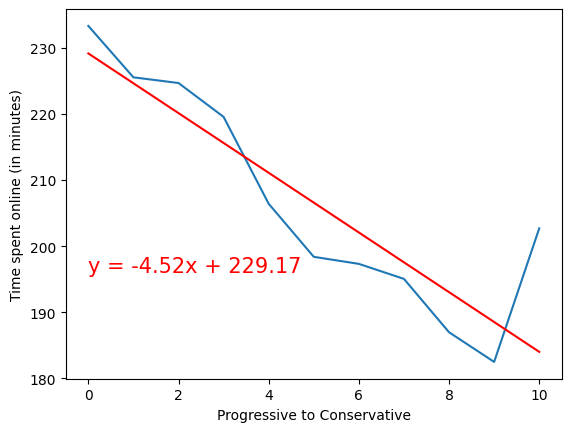

In [11]:
# pulling subset of data from main dataset for first visualization
first_vis_data = nes_data.loc[:,
                            ["essround", 
                             "idno", 
                             "cntry", 
                             "netustm", 
                             "lrscale"]]

# dropping any rows with null values
first_vis_cleaned = first_vis_data.dropna()


# filtering out responses that do not fall along scale 
# Values outside these bounds indicate (Failed to answer, refused to answer, did not know, not applicable, etc)
first_vis_cleaned = first_vis_cleaned.loc[  (first_vis_cleaned["lrscale"] <=10) &
                                            (first_vis_cleaned["netustm"] <=6000) ,
                                         ["essround", "idno", "netustm", "lrscale", "cntry"]]
 # intialize dataframe to hold averages
first_vis_averages =[]

# group by independant variable and then average by dependant variable
first_vis_averages = first_vis_cleaned.groupby(["lrscale"])\
                                      .agg({
                                           "netustm":"mean" 
                                           })
# pull independant variable out of index and back into own column
first_vis_averages = first_vis_averages.reset_index()

# Sort values by left to right scale
first_vis_averages = first_vis_averages.sort_values("lrscale")

# Create lists to hold x values and y values to pass to linear regression
x_values = first_vis_averages["lrscale"]
y_values = first_vis_averages["netustm"]

LinRegressWPlot(x_values,y_values,"Progressive to Conservative","Time spent online (in minutes)", (0,196),"LRScale_by_TimeSpentOnline")

first_vis_cleaned.to_csv(f"Data/LRScale_by_TimeSpentOnline.csv")

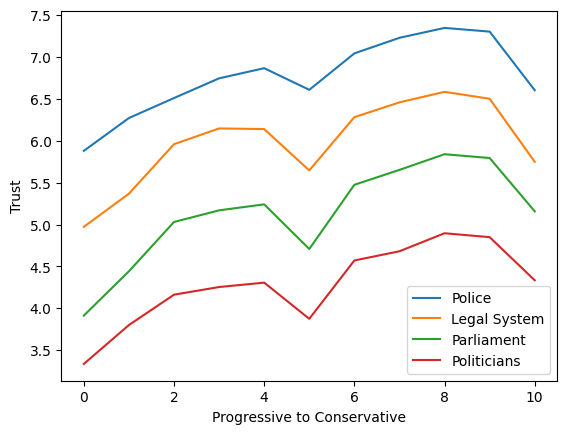

In [5]:
# pulling subset of data from main dataset for first visualization
second_vis_data = nes_data.loc[:,["essround", "idno", "trstlgl", "trstplc", "trstplt", "trstprl",  "lrscale"]]

# dropping any rows with null values
second_vis_cleaned = second_vis_data.dropna()


# filtering out responses that do not fall along scale 
# Values outside these bounds indicate (Failed to answer, refused to answer, did not know, not applicable, etc)
second_vis_cleaned = second_vis_cleaned.loc[(second_vis_cleaned["trstlgl"] <=10) & 
                                            (second_vis_cleaned["trstplt"] <=10) &
                                            (second_vis_cleaned["trstplc"] <=10) &
                                            (second_vis_cleaned["trstprl"] <=10) &
                                            (second_vis_cleaned["lrscale"] <=10) ,
                                         ["essround", "idno", "trstlgl", "trstplc", "trstplt", "trstprl", "lrscale"]]

 # intialize dataframe to hold averages
second_vis_averages =[]

# group by independant variable and then average by dependant variable
second_vis_averages = second_vis_cleaned.groupby(["lrscale"])\
                                      .agg({"trstlgl": "mean" ,
                                            "trstplc": "mean" ,
                                            "trstplt": "mean" ,
                                            "trstprl": "mean" 
                                            })
# pull independant variable out of index and back into own column
second_vis_averages = second_vis_averages.reset_index()

# Sort values by left to right scale
second_vis_averages = second_vis_averages.sort_values("lrscale")

# output data to csv from this visualization
second_vis_cleaned.to_csv(f"Data/Trust_Authority_Broad.csv")


# generate plot. Since there are so may values, did not redo linear regression and created this plot maunally
fig1, ax1 =plt.subplots()
ax1.set(xlabel = "Progressive to Conservative", ylabel = "Trust")
ax1.plot("lrscale", "trstplc",data = second_vis_averages,label="Police")
ax1.plot("lrscale", "trstlgl",data = second_vis_averages, label="Legal System")
ax1.plot("lrscale", "trstprl",data = second_vis_averages,label="Parliament")
ax1.plot("lrscale", "trstplt",data = second_vis_averages,label="Politicians")
ax1.legend()

# saves figure to images folder for use in readme/powerpoint
plt.savefig('Images/Trust_Authority_Broad.png', bbox_inches='tight')
plt.show()



The r-value is: 0.6479377613273456


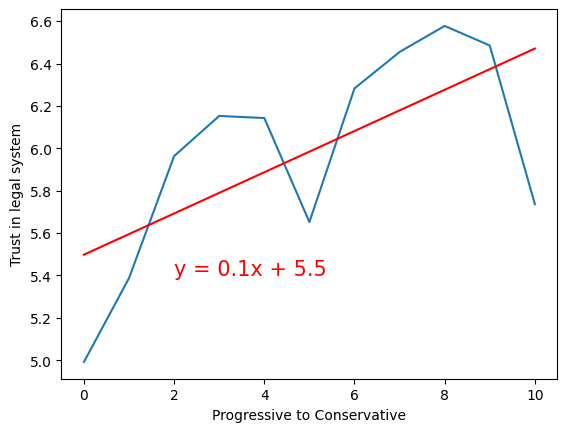

In [6]:
# pulling subset of data from main dataset for third visualization
third_vis_data = nes_data.loc[:,
                            ["essround", 
                             "idno", 
                             "cntry", 
                             "trstlgl",  
                             "lrscale"]]

# dropping any rows with null values
third_vis_cleaned = third_vis_data.dropna()


# filtering out responses that do not fall along scale 
# Values outside these bounds indicate (Failed to answer, refused to answer, did not know, not applicable, etc)
third_vis_cleaned = third_vis_cleaned.loc[(third_vis_cleaned["trstlgl"] <=10) & 
                                            (third_vis_cleaned["lrscale"] <=10) ,
                                         ["essround", "idno", "trstlgl", "lrscale","cntry"]]
 # intialize dataframe to hold averages
third_vis_averages =[]

# group by independant variable and then average by dependant variable
third_vis_averages = third_vis_cleaned.groupby(["lrscale"])\
                                      .agg({"trstlgl": "mean"})
# pull independant variable out of index and back into own column
third_vis_averages = third_vis_averages.reset_index()

# Sort values by left to right scale
third_vis_averages = third_vis_averages.sort_values("lrscale")

# Create lists to hold x values and y values to pass to linear regression
x_values = third_vis_averages["lrscale"]
y_values = third_vis_averages["trstlgl"]

# call linear regression function
LinRegressWPlot(x_values, y_values,"Progressive to Conservative","Trust in legal system", (2, 5.4
                                                                                          ),"LRScale_by_TrustLegal")

# output data to csv from this visualization
third_vis_cleaned.to_csv(f"Data/LRScale_by_TrustLegal.csv")

The r-value is: 0.4469870631548258


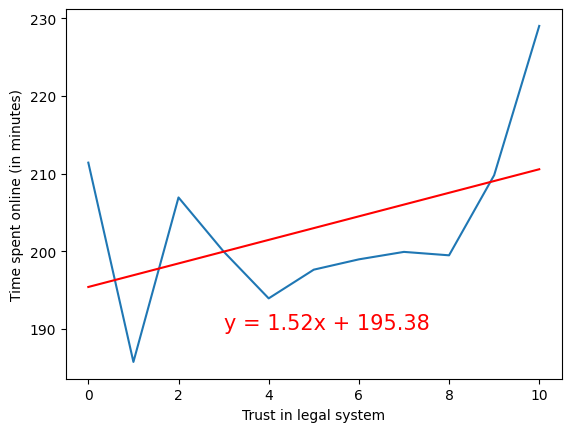

In [7]:
# pulling subset of data from main dataset for fouth visualization
fourth_vis_data = nes_data.loc[:,
                            ["essround", 
                             "idno", 
                             "cntry", 
                             "trstlgl",  
                             "netustm"]]

# dropping any rows with null values
fourth_vis_cleaned = fourth_vis_data.dropna()


# filtering out responses that do not fall along scale 
# Values outside these bounds indicate (Failed to answer, refused to answer, did not know, not applicable, etc)
fourth_vis_cleaned = fourth_vis_cleaned.loc[(fourth_vis_cleaned["trstlgl"] <=10) & 
                                            (fourth_vis_cleaned["netustm"] <=6000) ,
                                         ["essround", "idno", "trstlgl", "netustm","cntry"]]
 # intialize dataframe to hold averages
fourth_vis_averages =[]

# group by independant variable and then average by dependant variable
fourth_vis_averages = fourth_vis_cleaned.groupby(["trstlgl"])\
                                      .agg({"netustm": "mean"})

# pull independant variable out of index and back into own column
fourth_vis_averages = fourth_vis_averages.reset_index()

# Sort values by left to right scale
fourth_vis_averages = fourth_vis_averages.sort_values("trstlgl")

# Create lists to hold x values and y values to pass to linear regression
y_values = fourth_vis_averages["netustm"]
x_values = fourth_vis_averages["trstlgl"]

# call linear regression function
LinRegressWPlot(x_values, y_values,"Trust in legal system", "Time spent online (in minutes)", (3,190),"TrustLegal_by_NetUsage")

# output data to csv from this visualization
fourth_vis_cleaned.to_csv(f"Data/TrustLegal_by_NetUsage.csv")